___
# Decision Tree Regression
___

## Imports

In [1]:
# data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

# data preprocesing
from sklearn.preprocessing import Imputer #replace missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #encoding categorical data
from sklearn.preprocessing import StandardScaler #feature scaling

#spliting data
from sklearn.model_selection import train_test_split

# models
from sklearn.tree import DecisionTreeRegressor

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

## Exploring the Dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


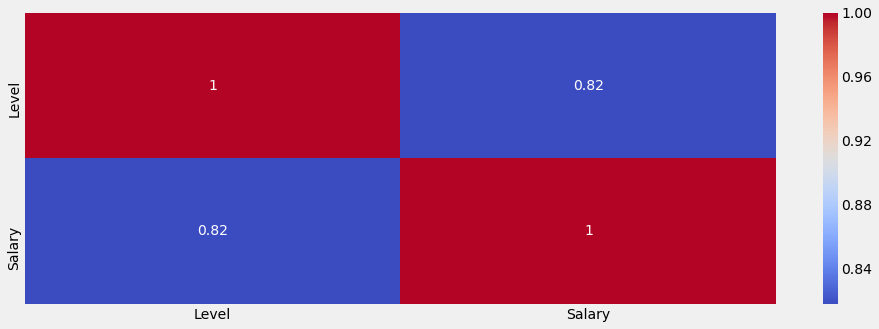

In [7]:
sns.heatmap(dataset.corr(), cmap="coolwarm", annot=True)

## Dataprocesing

In [9]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

## Creating and Training the model

In [10]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

## Perfomance

In [13]:
def plot_performance(X, y, regressor, model_name):
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'red')
    y_predict = regressor.predict(X_grid)
    plt.plot(X_grid, y_predict, color = 'blue')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.title( model_name.upper())
    plt.show()

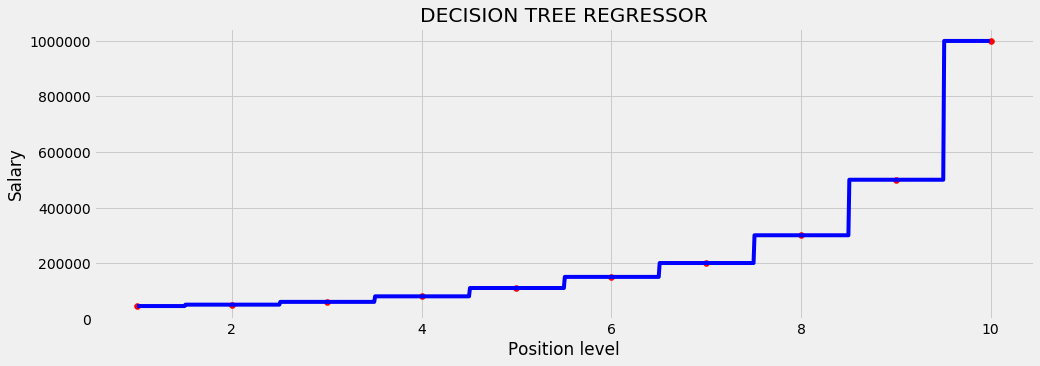

In [14]:
plot_performance(X,y,regressor,"Decision Tree Regressor")

In [16]:
regressor.predict(6.5)[0]

150000.0